# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/investor-relations). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

Instructions

This section divides the instructions for this Challenge into four steps and an optional fifth step, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

* Step 5 (optional): Forecast revenue by using time series models

The following subsections detail these steps.

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

2. Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

3. Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?

## Step 5 (Optional): Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

1. Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

2. Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

3. Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.


## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install pystan
!pip install prophet
!pip install hvplot --upgrade
!pip install holoviews
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 4.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 4.2 MB/s 
     |████████████████████████████████| 965 kB 55.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

In [2]:
# Upload the "google_hourly_search_trends.csv" file into Colab, then store in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

from google.colab import files

uploaded = files.upload()

Saving google_hourly_search_trends.csv to google_hourly_search_trends.csv


In [3]:
df_mercado_trends = pd.read_csv(
    'google_hourly_search_trends.csv',
    infer_datetime_format=True,
    parse_dates=True,
    index_col='Date',
    )
# Review the first and last five rows of the DataFrame

display(df_mercado_trends.head())

# Review the data types of the DataFrame using the info function
display(df_mercado_trends.info())

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


None

In [4]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Slice the DataFrame to just the month of May 2020

df_may_2020 = df_mercado_trends["2020-05"]
display(df_may_2020.head())

# Use hvPlot to visualize the data for May 2020
df_may_2020.hvplot()


Output hidden; open in https://colab.research.google.com to view.

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [5]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_mercado_trends["2020-05-01": "2020-05-31"].sum()

# View the traffic_may_2020 value
traffic_may_2020


Search Trends    38181
dtype: int64

<AxesSubplot:title={'center':'MercadoLibre - Monthly Median Search Traffic Across All Months'}, xlabel='Date,Date'>

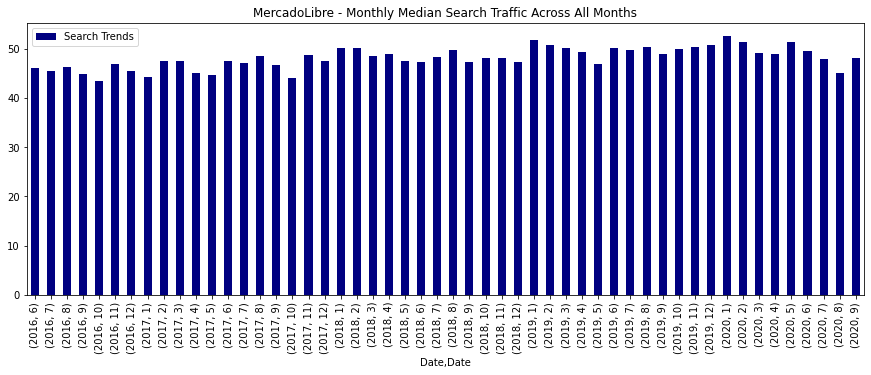

In [6]:
from pandas.io.formats.style import Axis
import matplotlib.dates as md
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Calcluate the monthly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
#fig, ax = plt.subplots()

median_monthly_traffic = df_mercado_trends.groupby(by=[df_mercado_trends.index.year, df_mercado_trends.index.month]).mean().plot.bar(
    title="MercadoLibre - Monthly Median Search Traffic Across All Months",
    rot=90,
    figsize=[15,5],
    color={"Search Trends":"navy"}
)

# View the median_monthly_traffic value
median_monthly_traffic


In [7]:
# Compare the search traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020_mean = df_mercado_trends["2020-05-01": "2020-05-31"].mean()
may2020mean = round(traffic_may_2020_mean,2)
print(f"The month of May 2020 mean search traffic volume was{may2020mean}.")




The month of May 2020 mean search traffic volume wasSearch Trends    51.32
dtype: float64.


##### Answer the following question: 

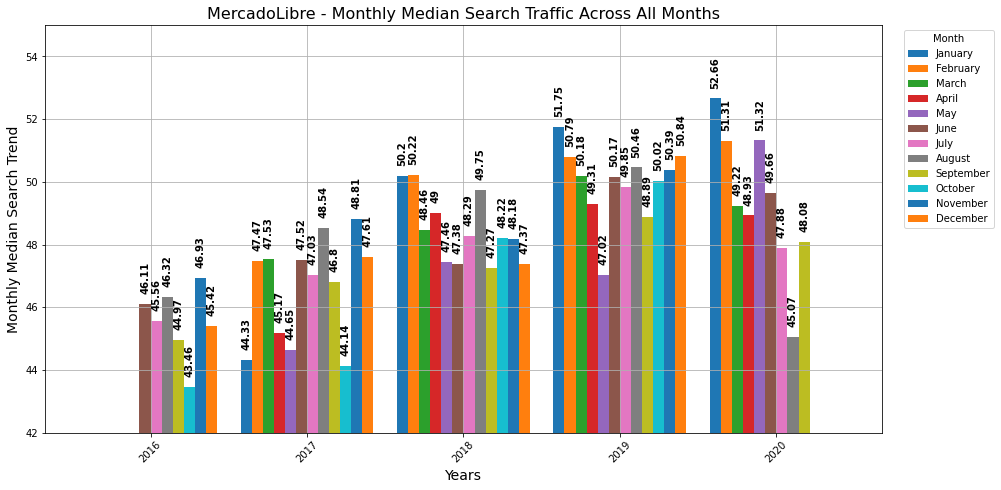

In [8]:
# Plot Monthly Median Search Traffic Across All Months
# Create figure and plot space 

from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import numpy as np

# Create df with updated group indexing with mean monthly trend values
monthly_mean_search_trends = df_mercado_trends.groupby(by=[df_mercado_trends.index.year, df_mercado_trends.index.month]).mean().round(2).unstack()

# Create a list to hold all Median Search Traffic values across all months to be used as the xticks on bar labels
monthly_mean_array = monthly_mean_search_trends.fillna(0).to_numpy()

# Create and instantiate bar plot for 'monthly_mean_search_trends' dataframe to reconfigure the display to be a more indepth/detailed bar chart
# Instantiate set_title, set_ylim, set_xlabel, set_ylabel, legend, xticks
fig, ax = plt.subplots(figsize=(15, 7.5))
monthly_mean_search_trends.plot(
    title ="MercadoLibre - Monthly Median Search Traffic Across All Months",
    ax = ax,
    kind='bar', 
    width = 0.85
)
ax.set_title("MercadoLibre - Monthly Median Search Traffic Across All Months", fontdict={'fontsize': 16, 'fontweight': 'medium'})
ax.set_ylim([42,55])
ax.set_xlabel('Years', fontsize=14)
ax.set_ylabel('Monthly Median Search Trend', fontsize=14)
ax.legend(title='Month')
plt.xticks(rotation = 45)

# Instantiate get_legend_handles 
handles, labels = ax.get_legend_handles_labels()
new_labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax.legend(handles = handles, labels = new_labels, loc = 'upper left', bbox_to_anchor = (1.02, 1), title="Month")

# Iterate through bar bins/containers populate each bar with its value, label_type placement location, rotation, padding(offset), fontsize, fontweight
for c in ax.containers:

    # annotate the container group
    ax.bar_label(c, label_type='edge', rotation=90, padding=10, fontsize=10, fontweight="heavy")

# Instantiate grid & display final graph
plt.grid()
plt.savefig('MercadoLibre_ Monthly_Median_Search_Traffic_Across_All_Months.png')
plt.show()

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Search traffic did in fact increase for the month of May, 2020. In fact it did appear to break the decreasing trend of the past 3 years leading up to and after May. However, it continued to oscillate random afterwards with - what appears to be - a slight downtrend in average searches in the later half of 2020. 

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

2. Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

3. Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

In [9]:
from bokeh.models.formatters import DatetimeTickFormatter
import datetime

# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the day of week 
group_dayofweek = df_mercado_trends.index.dayofweek

#df_mercado_trends['Day of Week'] = group_dayofweek
#display(df_mercado_trends)

df_mercado_trends['Day of Week'] = df_mercado_trends.index.strftime('%A')
display(df_mercado_trends.head(3))


#formatter = DatetimeTickFormatter(days=['%m/%d', '%a%d'])
#dayofweek = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday"}
#dayofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Line plot (hvPlot) displayed
display(df_mercado_trends['Search Trends'].groupby(group_dayofweek).mean().hvplot(
    title="MercadoLibre - Average Traffic By Day of the Week",
    x='Day of Week',
    y='Search Trends',
    xticks= 'Day of Week'
    #xformatter=DatetimeTickFormatter(days=['%m/%d', '%a%d'])
    #xformatter=formatter
))

# Create array of mean values for days of the week search trends 
day_of_week_search_mean = df_mercado_trends['Search Trends'].groupby(group_dayofweek).mean().round(2)
display(day_of_week_search_mean)

# Create new dataframe with day of the week search trend averages
df_mercado_day_avg_trend = pd.DataFrame()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_mercado_day_avg_trend['Day of Week'] = weekdays
df_mercado_day_avg_trend['Average Search Trend Value'] = day_of_week_search_mean
display(df_mercado_day_avg_trend)

# Plot df_mercado_day_avg_trend
display(df_mercado_day_avg_trend.hvplot.scatter(
    title="MercadoLibre - Average Traffic By Day of the Week",
    x='Day of Week',
    y='Average Search Trend Value',

))

# Display the first and last 100 group_dayofweek array int values
display(len(group_dayofweek))
display(group_dayofweek[0:100])
display(group_dayofweek[(len(group_dayofweek))-100:-1])

Output hidden; open in https://colab.research.google.com to view.

#### Step 2: Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

In [10]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the hour of the day and day of week search traffic as a heatmap.
df_mercado_trends.hvplot.heatmap(
    title='MercadoLibre - Hour of Day vs Day of the Week Search Traffic Volume [Heatmap]',
    x='index.hour',
    y='index.dayofweek',
    C='Search Trends',
    cmap='reds'
).aggregate(function=np.mean)

Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Does any day-of-week effect that you observe concentrate in just a few hours of that day?

**Answer:** It appears that Monday around 23hr-01hr are the busiest. Also second heaviest traffic is Tuesday (roughly around the same time period). 

#### Step 3: Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

In [12]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the week of the year

# Create group_weekofyear variable to hold indexed int of week of the year based on datetime index
group_weekofyear = df_mercado_trends.index.weekofyear

# Plot 'Search Trends' as a function of group_weekofyear datetime indexing
display(df_mercado_trends['Search Trends'].groupby(group_weekofyear).mean().hvplot.line(
    title="MercadoLibre - Average Search Traffic By Week of the Year",
    x='Week of the Year',
    y='Search Trends',
    xticks= 'Week of the Year',
    color="green"
))

Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

**Answer:** Yes, it appears that there is a strong uptrend from weeks 40 through 52, as indicated on the hvplot line graph, displayed above.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [13]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
from google.colab import files
uploaded = files.upload()

df_mercado_stock = pd.read_csv(
    'mercado_stock_price.csv',
    infer_datetime_format=True,
    parse_dates=True,
    index_col='date',
    )

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())


Saving mercado_stock_price.csv to mercado_stock_price.csv


,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


In [14]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.hvplot(
    title="MercadoLibre - Hourly Closing Stock Price",
    x='date',
    y='close',
    color="blue"
)


Output hidden; open in https://colab.research.google.com to view.

In [15]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna().drop(columns=['Day of Week'])

# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [16]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
first_half_2020 = mercado_stock_trends_df.loc["2020-01":"2020-06"]

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


In [17]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `hvplot(shared_axes=False, subplots=True).cols(1)`
first_half_2020.hvplot.line(
    shared_axes=False,
    subplots=True
).cols(1)


Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** There are some general common correlations that appear relevant - just by using visual indicators on the chart. For instance, looking at the date range of 02/25/2020-03/17/2020 there appears to be a drop in search volume corresponding to Google Search Trends associated with MercadoLibre. Additionally, between 03/24/2020-04/27/2020 there appaers to be a slight upward moving trend in search related volume. As well, this corresponds to a substantial short accumulation and rally in price between the same aforementioned timeframe.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [18]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1)
mercado_stock_trends_df.head()

,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00,135.16,6.0,NaN
2016-06-01 10:00:00,136.63,12.0,6.0
2016-06-01 11:00:00,136.56,22.0,12.0
2016-06-01 12:00:00,136.42,33.0,22.0
2016-06-01 13:00:00,136.10,40.0,33.0


In [19]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['close'].pct_change().rolling(window=4).std()
mercado_stock_trends_df.head()

,close,Search Trends,Lagged Search Trends,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN
2016-06-01 11:00:00,136.56,22.0,12.0,NaN
2016-06-01 12:00:00,136.42,33.0,22.0,NaN
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134


In [20]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the stock volatility
#first_half_2020[["Lagged Search Trends","Stock Volatility"]].hvplot.scatter(x='Lagged Search Trends', y='Stock Volatility')
mercado_stock_trends_df.hvplot(
    y='Stock Volatility'
)


Output hidden; open in https://colab.research.google.com to view.

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [21]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()


In [22]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [23]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[["Lagged Search Trends", "Stock Volatility", "Hourly Stock Return"]].corr()


,Lagged Search Trends,Stock Volatility,Hourly Stock Return
Lagged Search Trends,1.000000,-0.148938,0.017929
Stock Volatility,-0.148938,1.000000,0.061424
Hourly Stock Return,0.017929,0.061424,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** There appears to be a relatively weak but present correlation between hourly stock volatility and hourly stock returns. 

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [24]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends = df_mercado_trends.drop(columns=['Day of Week'])
mercado_prophet_df = df_mercado_trends.reset_index()
#display(mercado_prophet_df)

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df.columns = ['ds', 'y']
#display(mercado_prophet_df)

# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()
#display(mercado_prophet_df)

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head())
display(mercado_prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [43]:
# Call the Prophet function, store as an object
model_mercado_trends = Prophet()


In [44]:
# Fit the time-series model.
model_mercado_trends.fit(mercado_prophet_df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmphn4a0rmk/y3ygkuq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphn4a0rmk/b4zf9fhj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6391', 'data', 'file=/tmp/tmphn4a0rmk/y3ygkuq1.json', 'init=/tmp/tmphn4a0rmk/b4zf9fhj.json', 'output', 'file=/tmp/tmphn4a0rmk/prophet_modelzc9dskl9/prophet_model-20221102151546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:16:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [45]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_trends.tail())


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [46]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head(5))
display(forecast_mercado_trends.tail(5))


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.390875,80.794925,98.478565,44.390875,44.390875,45.227910,45.227910,45.227910,41.452579,...,1.860554,1.860554,1.860554,1.914777,1.914777,1.914777,0.0,0.0,0.0,89.618785
1,2016-06-01 01:00:00,44.391810,77.894366,94.683473,44.391810,44.391810,41.673716,41.673716,41.673716,37.943427,...,1.810460,1.810460,1.810460,1.919830,1.919830,1.919830,0.0,0.0,0.0,86.065527
2,2016-06-01 02:00:00,44.392746,67.658531,84.185302,44.392746,44.392746,31.350247,31.350247,31.350247,27.656523,...,1.768874,1.768874,1.768874,1.924851,1.924851,1.924851,0.0,0.0,0.0,75.742993
3,2016-06-01 03:00:00,44.393681,52.163881,69.973022,44.393681,44.393681,16.083050,16.083050,16.083050,12.417320,...,1.735889,1.735889,1.735889,1.929841,1.929841,1.929841,0.0,0.0,0.0,60.476731
4,2016-06-01 04:00:00,44.394617,35.005976,51.903783,44.394617,44.394617,-1.031813,-1.031813,-1.031813,-4.678072,...,1.711460,1.711460,1.711460,1.934799,1.934799,1.934799,0.0,0.0,0.0,43.362804


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
39101,2020-11-30 04:00:00,45.125316,31.623893,47.772968,44.098183,46.034013,-5.416128,-5.416128,-5.416128,-4.678072,...,-1.746879,-1.746879,-1.746879,1.008823,1.008823,1.008823,0.0,0.0,0.0,39.709188
39102,2020-11-30 05:00:00,45.124573,15.572737,32.979392,44.096962,46.033948,-20.886499,-20.886499,-20.886499,-20.514501,...,-1.384997,-1.384997,-1.384997,1.012999,1.012999,1.012999,0.0,0.0,0.0,24.238074
39103,2020-11-30 06:00:00,45.123831,3.603444,21.333667,44.095742,46.033882,-32.851404,-32.851404,-32.851404,-32.844565,...,-1.023976,-1.023976,-1.023976,1.017138,1.017138,1.017138,0.0,0.0,0.0,12.272427
39104,2020-11-30 07:00:00,45.123089,-2.511855,13.542353,44.094521,46.033816,-40.122788,-40.122788,-40.122788,-40.477950,...,-0.666077,-0.666077,-0.666077,1.021239,1.021239,1.021239,0.0,0.0,0.0,5.000301
39105,2020-11-30 08:00:00,45.122347,-5.828735,11.022659,44.093301,46.033751,-42.316903,-42.316903,-42.316903,-43.028701,...,-0.313506,-0.313506,-0.313506,1.025304,1.025304,1.025304,0.0,0.0,0.0,2.805444


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

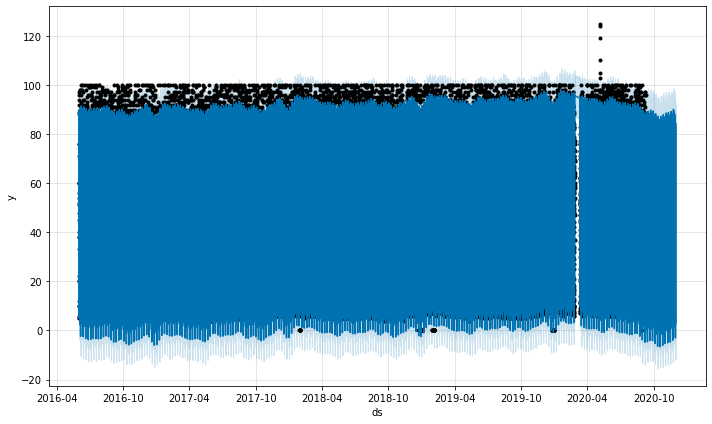

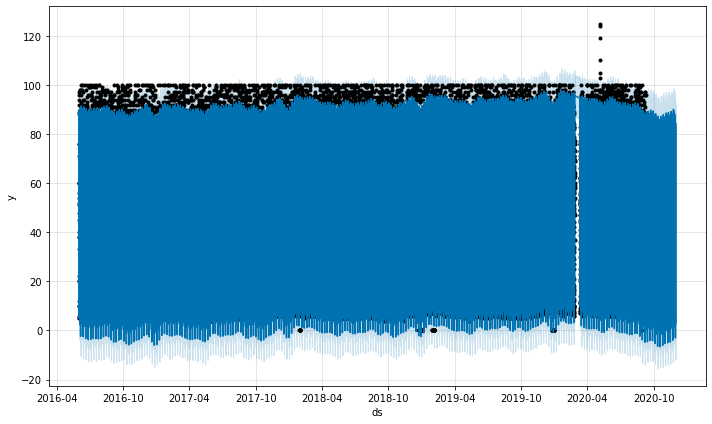

In [47]:
# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends)

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** The near-term forecast of the popularity of MercadoLibre appears to be set to downtrend, according to the Prophet forecast model period=2000, freq=H(hours) ahead.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [50]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
#forecast_mercado_trends = forecast_mercado_trends.set_index('ds')
display(forecast_mercado_trends.head())

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
#forecast_mercado_trends = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]
#display(forecast_mercado_trends.head())
#display()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2016-06-01 00:00:00,44.390875,80.794925,98.478565,44.390875,44.390875,45.227910,45.227910,45.227910,41.452579,41.452579,...,1.860554,1.860554,1.860554,1.914777,1.914777,1.914777,0.0,0.0,0.0,89.618785
2016-06-01 01:00:00,44.391810,77.894366,94.683473,44.391810,44.391810,41.673716,41.673716,41.673716,37.943427,37.943427,...,1.810460,1.810460,1.810460,1.919830,1.919830,1.919830,0.0,0.0,0.0,86.065527
2016-06-01 02:00:00,44.392746,67.658531,84.185302,44.392746,44.392746,31.350247,31.350247,31.350247,27.656523,27.656523,...,1.768874,1.768874,1.768874,1.924851,1.924851,1.924851,0.0,0.0,0.0,75.742993
2016-06-01 03:00:00,44.393681,52.163881,69.973022,44.393681,44.393681,16.083050,16.083050,16.083050,12.417320,12.417320,...,1.735889,1.735889,1.735889,1.929841,1.929841,1.929841,0.0,0.0,0.0,60.476731
2016-06-01 04:00:00,44.394617,35.005976,51.903783,44.394617,44.394617,-1.031813,-1.031813,-1.031813,-4.678072,-4.678072,...,1.711460,1.711460,1.711460,1.934799,1.934799,1.934799,0.0,0.0,0.0,43.362804


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.618785,80.794925,98.478565
2016-06-01 01:00:00,86.065527,77.894366,94.683473
2016-06-01 02:00:00,75.742993,67.658531,84.185302
2016-06-01 03:00:00,60.476731,52.163881,69.973022
2016-06-01 04:00:00,43.362804,35.005976,51.903783
...,...,...,...
2020-11-30 04:00:00,39.709188,31.623893,47.772968
2020-11-30 05:00:00,24.238074,15.572737,32.979392
2020-11-30 06:00:00,12.272427,3.603444,21.333667


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

In [52]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# From the forecast_mercado_trends DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 

forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:].hvplot()
#forecast_mercado_trends.iloc[-2000:].hvplot()

Output hidden; open in https://colab.research.google.com to view.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.390875,80.794925,98.478565,44.390875,44.390875,45.227910,45.227910,45.227910,41.452579,...,1.860554,1.860554,1.860554,1.914777,1.914777,1.914777,0.0,0.0,0.0,89.618785
1,2016-06-01 01:00:00,44.391810,77.894366,94.683473,44.391810,44.391810,41.673716,41.673716,41.673716,37.943427,...,1.810460,1.810460,1.810460,1.919830,1.919830,1.919830,0.0,0.0,0.0,86.065527
2,2016-06-01 02:00:00,44.392746,67.658531,84.185302,44.392746,44.392746,31.350247,31.350247,31.350247,27.656523,...,1.768874,1.768874,1.768874,1.924851,1.924851,1.924851,0.0,0.0,0.0,75.742993
3,2016-06-01 03:00:00,44.393681,52.163881,69.973022,44.393681,44.393681,16.083050,16.083050,16.083050,12.417320,...,1.735889,1.735889,1.735889,1.929841,1.929841,1.929841,0.0,0.0,0.0,60.476731
4,2016-06-01 04:00:00,44.394617,35.005976,51.903783,44.394617,44.394617,-1.031813,-1.031813,-1.031813,-4.678072,...,1.711460,1.711460,1.711460,1.934799,1.934799,1.934799,0.0,0.0,0.0,43.362804


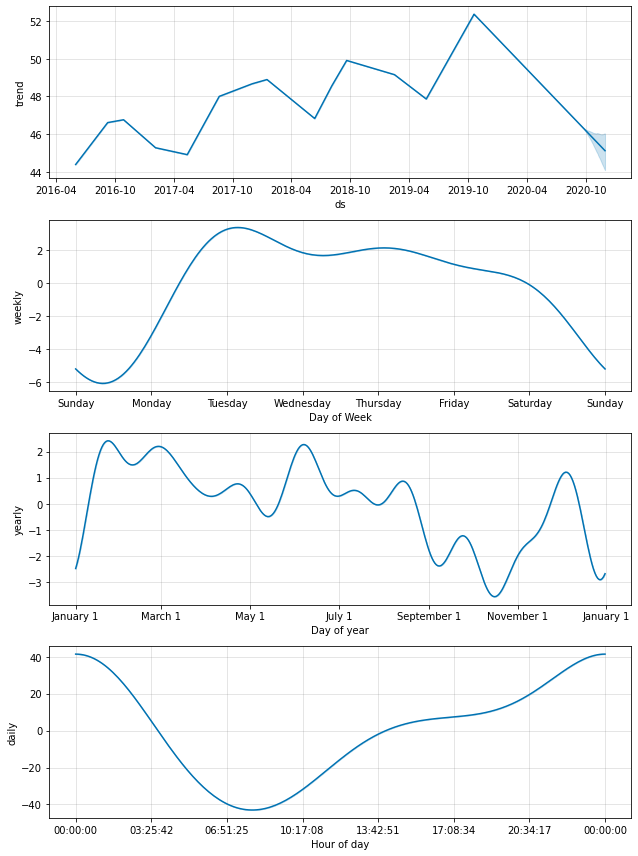

In [53]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()
display(forecast_mercado_trends.head())

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 
display(figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends))


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** The time of the day that exhibits the greatest popularity is 00:00:00. Now, if this timestamp is calibrated to the base UTC time, it would equate to approximately 17:00:00 (5pm GMT-7, Seattle) time. The reason I equate it to Seattle time is because a search of Mercadolibre's central server location results in a server IP located in Seattle, WA, USA (AWS Server (Amazon-CF Network). Converting this to local Montevideo, Uruguay time this then becomes 21:00:00 (9pm local GMT-3 time) Montevideo time. This makes more rationale sense, as most MercadoLibre's residences in an around latin America would shop between the longitudinal time zones of South America (between UTC/GMT-5 to UTC/GMT-3 (arguably UTC-2)). 

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** The day of the week that receives the most search traffic is Tuesday.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** The lowest point of search traffic in the calendar year occurs just after the Christmas surge - generally between 12/25-12/31. (*Lowest value generally lies on Christmas day itself - 12/25) - on average.


## Step 5 (Optional): Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

1. Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data. The daily sales figures are quoted in millions of USD dollars.

2. Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

3. Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.




#### Step 1: Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

In [54]:
# Upload the "mercado_daily_revenue.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the DatetimeIndex
# Sales are quoted in millions of US dollars
from google.colab import files
uploaded = files.upload()

df_mercado_daily_rev = pd.read_csv(
    'mercado_daily_revenue.csv',
    infer_datetime_format=True,
    parse_dates=True,
    index_col='date',
    )
# Review the DataFrame
display(df_mercado_daily_rev.head(5))
display(df_mercado_daily_rev.tail(5))

Saving mercado_daily_revenue.csv to mercado_daily_revenue.csv


,Daily Sales
date,
2019-01-01,0.626452
2019-01-02,1.301069
2019-01-03,1.751689
2019-01-04,3.256294
2019-01-05,3.732920


,Daily Sales
date,
2020-05-10,17.467814
2020-05-11,17.537152
2020-05-12,18.031773
2020-05-13,19.165315
2020-05-14,20.246570


In [55]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the daily sales figures 
df_mercado_daily_rev.hvplot()


Output hidden; open in https://colab.research.google.com to view.

In [56]:
# Apply a Facebook Prophet model to the data.

# Set up the dataframe in the neccessary format:
# Reset the index so that date becomes a column in the DataFrame
mercado_sales_prophet_df = df_mercado_daily_rev.reset_index()

# Adjust the columns names to the Prophet syntax
mercado_sales_prophet_df.columns = ['ds', 'y']

# Visualize the DataFrame
mercado_sales_prophet_df.head()


,ds,y
0,2019-01-01,0.626452
1,2019-01-02,1.301069
2,2019-01-03,1.751689
3,2019-01-04,3.256294
4,2019-01-05,3.732920


In [57]:
# Create the model
mercado_sales_prophet_model = Prophet()

# Fit the model
mercado_sales_prophet_model.fit(mercado_sales_prophet_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphn4a0rmk/zg08e9aj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphn4a0rmk/7ov4js6z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56600', 'data', 'file=/tmp/tmphn4a0rmk/zg08e9aj.json', 'init=/tmp/tmphn4a0rmk/7ov4js6z.json', 'output', 'file=/tmp/tmphn4a0rmk/prophet_models3g2a28j/prophet_model-20221102160827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:08:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:08:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [58]:
# Predict sales for 90 days (1 quarter) out into the future.

# Start by making a future dataframe
mercado_sales_prophet_future = mercado_sales_prophet_model.make_future_dataframe(periods=90, freq='D')

# Display the last five rows of the future DataFrame
display(mercado_sales_prophet_future.tail())


,ds
585,2020-08-08
586,2020-08-09
587,2020-08-10
588,2020-08-11
589,2020-08-12


In [60]:
# Make predictions for the sales each day over the next quarter
mercado_sales_prophet_forecast = mercado_sales_prophet_model.predict(mercado_sales_prophet_future)

# Display the first 5 rows of the resulting DataFrame
display(mercado_sales_prophet_forecast.head())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,0.132576,-1.701649,1.999156,0.132576,0.132576,0.063966,0.063966,0.063966,0.063966,0.063966,0.063966,0.0,0.0,0.0,0.196542
1,2019-01-02,0.171762,-1.617644,2.204387,0.171762,0.171762,0.083117,0.083117,0.083117,0.083117,0.083117,0.083117,0.0,0.0,0.0,0.254879
2,2019-01-03,0.210947,-1.647253,2.139102,0.210947,0.210947,0.019670,0.019670,0.019670,0.019670,0.019670,0.019670,0.0,0.0,0.0,0.230618
3,2019-01-04,0.250133,-1.640410,2.118959,0.250133,0.250133,-0.058258,-0.058258,-0.058258,-0.058258,-0.058258,-0.058258,0.0,0.0,0.0,0.191875
4,2019-01-05,0.289318,-1.701575,1.964812,0.289318,0.289318,-0.124450,-0.124450,-0.124450,-0.124450,-0.124450,-0.124450,0.0,0.0,0.0,0.164868


#### Step 2: Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

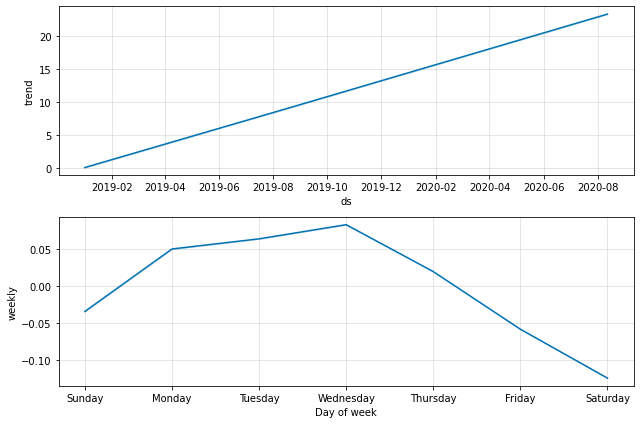

In [61]:
# Use the plot_components function to analyze seasonal patterns in the company's revenue
fig_mercado_sales_rev = mercado_sales_prophet_model.plot_components(mercado_sales_prophet_forecast)


##### Answer the following question:

**Question:** For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

**Answer:** Based on the plot_components graphical interpretation of the sales forecasting model of MercadoLibre, the peak revenue days are Wednesdays, followed by Tuesday.

#### Step 3: Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.

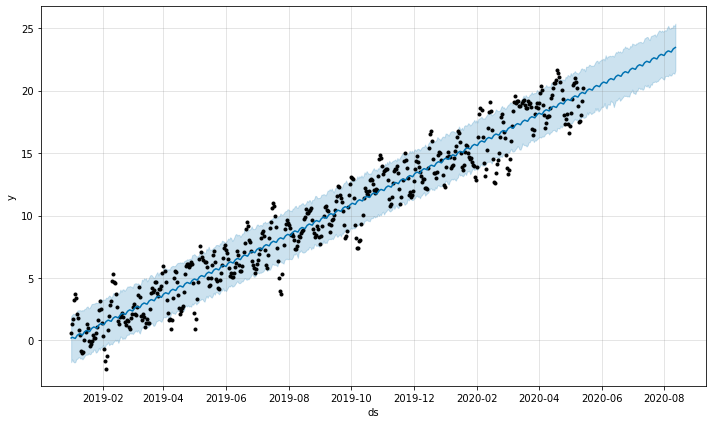

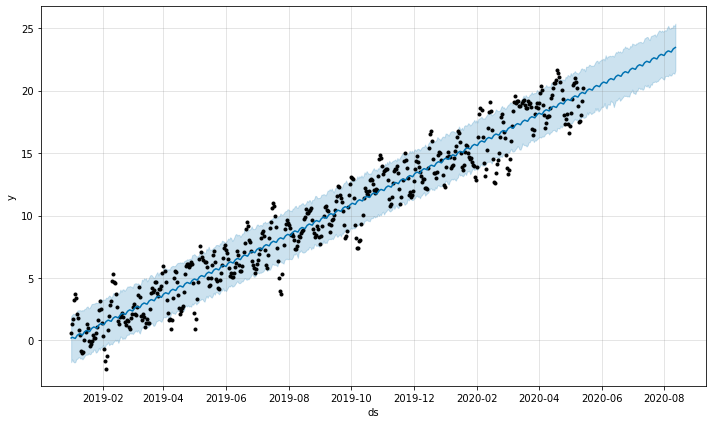

In [ ]:
# Plot the predictions for the Mercado sales
mercado_sales_prophet_model.plot(mercado_sales_prophet_forecast)


In [62]:
# For the mercado_sales_prophet_forecast DataFrame, set the ds column as the DataFrame Index
mercado_sales_prophet_forecast = mercado_sales_prophet_forecast.set_index(["ds"])

# Display the first and last five rows of the DataFrame
display(mercado_sales_prophet_forecast.head())
display(mercado_sales_prophet_forecast.tail())


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2019-01-01,0.132576,-1.701649,1.999156,0.132576,0.132576,0.063966,0.063966,0.063966,0.063966,0.063966,0.063966,0.0,0.0,0.0,0.196542
2019-01-02,0.171762,-1.617644,2.204387,0.171762,0.171762,0.083117,0.083117,0.083117,0.083117,0.083117,0.083117,0.0,0.0,0.0,0.254879
2019-01-03,0.210947,-1.647253,2.139102,0.210947,0.210947,0.019670,0.019670,0.019670,0.019670,0.019670,0.019670,0.0,0.0,0.0,0.230618
2019-01-04,0.250133,-1.640410,2.118959,0.250133,0.250133,-0.058258,-0.058258,-0.058258,-0.058258,-0.058258,-0.058258,0.0,0.0,0.0,0.191875
2019-01-05,0.289318,-1.701575,1.964812,0.289318,0.289318,-0.124450,-0.124450,-0.124450,-0.124450,-0.124450,-0.124450,0.0,0.0,0.0,0.164868


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2020-08-08,23.220435,21.199156,24.968482,23.217267,23.223250,-0.124450,-0.124450,-0.124450,-0.124450,-0.124450,-0.124450,0.0,0.0,0.0,23.095985
2020-08-09,23.260045,21.451634,25.097323,23.256800,23.262922,-0.034283,-0.034283,-0.034283,-0.034283,-0.034283,-0.034283,0.0,0.0,0.0,23.225762
2020-08-10,23.299654,21.475161,25.260854,23.296354,23.302619,0.050237,0.050237,0.050237,0.050237,0.050237,0.050237,0.0,0.0,0.0,23.349891
2020-08-11,23.339264,21.455011,25.180628,23.335897,23.342296,0.063966,0.063966,0.063966,0.063966,0.063966,0.063966,0.0,0.0,0.0,23.403230
2020-08-12,23.378874,21.538430,25.449270,23.375446,23.382007,0.083117,0.083117,0.083117,0.083117,0.083117,0.083117,0.0,0.0,0.0,23.461992


In [63]:
# Produce a sales forecast for the finance division
# giving them a number for expected total sales next quarter.
# Provide best case (yhat_upper), worst case (yhat_lower), and most likely (yhat) scenarios.

hv.extension('bokeh')
display(mercado_sales_prophet_forecast[["yhat", "yhat_upper", "yhat_lower"]].iloc[-90:,:].hvplot())

# Create a forecast_quarter Dataframe for the period 2020-07-01 to 2020-09-30
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
mercado_sales_forecast_quarter = mercado_sales_prophet_forecast[["yhat_upper", "yhat_lower", "yhat"]].loc["2020-07-01": "2020-09-30"]

# Update the column names for the forecast_quarter DataFrame
# to match what the finance division is looking for 
col_names = {'yhat':'Expected Total Sales', 'yhat_lower':'Worst-Case Scenario', 'yhat_upper':'Best-Case Scenario'}

mercado_sales_forecast_quarter.rename(columns=col_names, inplace=True)
#mercado_sales_forecast_quarter = # YOUR CODE HERE

# Review the last five rows of the DataFrame
display(mercado_sales_forecast_quarter.tail())


Output hidden; open in https://colab.research.google.com to view.

In [64]:
# Displayed the summed values for all the rows in the forecast_quarter DataFrame
mercado_quarter_forecast_totals = mercado_sales_forecast_quarter.sum()
display(mercado_quarter_forecast_totals)


Best-Case Scenario      1050.957675
Worst-Case Scenario      887.985973
Expected Total Sales     969.607010
dtype: float64

### Based on the forecast information generated above, produce a sales forecast for the finance division, giving them a number for expected total sales next quarter. Include best and worst case scenarios, to better help the finance team plan.

**Answer** Based on the forecast information generated above, the sales revenue forecast for the following quarter is expected to be 969.61M (USD) with a worst case scenario of 887.91M (USD), and a best-case top forecast revenue of 1,050.94M (USD). 